![banner](banner.png)

# Convolutional Neural Networks - Lab 5.
## Maestría en Ciencias de la Computación.
### Guillermo Reyes Martínez.

In [1]:
from sys import argv
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
def pred(x, W, B):
    """
    calculate y_hat = m*x + c with learned weights and biases.
    y_hat is the prediction
    """
    y_hat = W*x + B
    return y_hat

In [3]:
def loss(x, y, W, B):
    """
    Mean squared error loss function
    """
    prediction = pred(x, W, B)
    squared_error = tf.square(prediction - y)
    # finally calculate the MSE (Mean Sqaured Error)
    mse = tf.reduce_mean(squared_error)
    return mse

In [4]:
def calculate_gradient(x, y, W, B):
    """
    Calculate the derivative of the loss
    """
    with tf.GradientTape() as tape:
        loss_value = loss(x, y, W, B)
        
    w_grad, b_grad = tape.gradient(loss_value, [W, B])
    return w_grad, b_grad

![Instrucciones](LAB5-1.png)

In [5]:
# read flash.dat to a list of lists
xdat = [i.strip().split() for i in open("./ex2x.dat").readlines()]
ydat = [i.strip().split() for i in open("./ex2y.dat").readlines()]
#set every item of sublists into a single array
x_train = [item for sublist in xdat for item in sublist]
y_train = [item for sublist in ydat for item in sublist]
#data taken was read as str due to the scientific notation, this code set all the array members
#as number
for i in range(len(x_train)):
    x_train[i] = (np.longdouble(x_train[i]))
for i in range(len(y_train)):
    y_train[i] = (np.longdouble(y_train[i]))

Text(0.5, 1.0, 'Training data set')

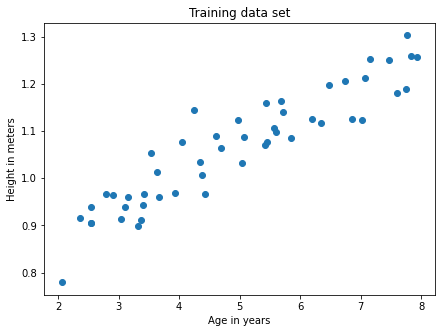

In [6]:
plt.figure(figsize=(7, 5), constrained_layout=False)
plt.scatter(x_train, y_train)
plt.xlabel("Age in years")
plt.ylabel("Height in meters")
plt.title("Training data set")

![Instrucciones](LAB5-2.png)

In [22]:
# number of training epochs 
num_epochs = 1
# learning rate
learning_rate = 0.07
# random initial values for weights
W = tf.Variable(np.random.randn())
B = tf.Variable(np.random.randn())
for epoch in range(num_epochs):
    w_grad, b_grad = calculate_gradient(x_train, y_train, W, B)
    
    dW, dB = w_grad * learning_rate, b_grad * learning_rate
    
    W.assign_sub(dW)
    B.assign_sub(dB)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, loss {loss(x_train, y_train, W, B):.3f}")
# check whether we get the desired `m` and `c` or not
print(f"Learned W: {W.numpy()}, learned B: {B.numpy()}")

test_loss = loss(x_train, y_train, W, B)
print(f"Test loss: {test_loss:.3f}")


Epoch: 0, loss 122.125
Learned W: -1.680093765258789, learned B: -1.3041419982910156
Test loss: 122.125


![Instrucciones](LAB5-3.png)

Learned W: 0.09842642396688461, learned B: 0.5602883100509644
Test loss: 0.006


Text(0.5, 1.0, 'Test data distribution and predicted y plot')

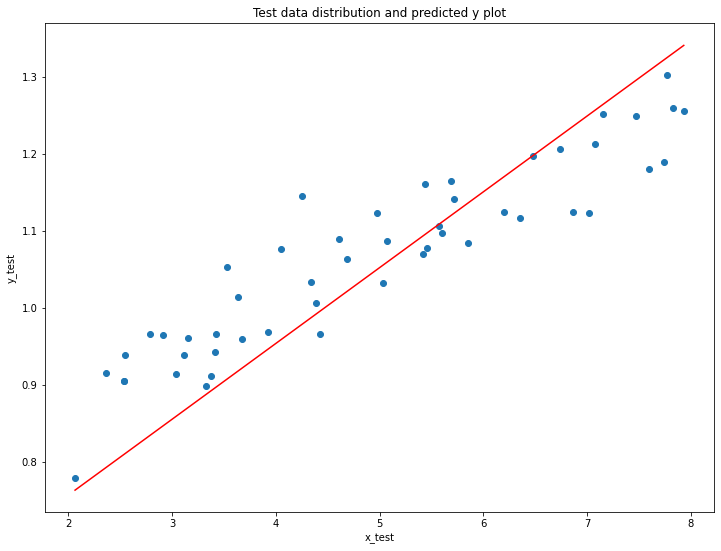

In [24]:
# number of training epochs 
num_epochs = 3000
# learning rate
learning_rate = 0.001
# random initial values for weights
W = tf.Variable(np.random.randn())
B = tf.Variable(np.random.randn())
for epoch in range(num_epochs):
    w_grad, b_grad = calculate_gradient(x_train, y_train, W, B)
    
    dW, dB = w_grad * learning_rate, b_grad * learning_rate
    
    W.assign_sub(dW)
    B.assign_sub(dB)
    
    #if epoch % 10 == 0:
        #print(f"Epoch: {epoch}, loss {loss(x_train, y_train, W, B):.3f}")
# check whether we get the desired `m` and `c` or not
print(f"Learned W: {W.numpy()}, learned B: {B.numpy()}")

test_loss = loss(x_train, y_train, W, B)
print(f"Test loss: {test_loss:.3f}")

# predicted y on on the test set
y_test_predicted = np.multiply(W.numpy(), x_train) + B.numpy()
# plot the predicted y values on the test data distribution
plt.figure(figsize=(12, 9))
plt.plot(x_train, y_test_predicted, c='red')
plt.scatter(x_train, y_train)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Test data distribution and predicted y plot')

![Instrucciones](LAB5-4.png)

In [25]:
test1 = pred(3.5, W, B)
test2 = pred(7, W, B)
print("For a boy of age 3.5 our predicted height is: ", test1)
print("For a boy of age 7 our predicted height is: ", test2)

For a boy of age 3.5 our predicted height is:  tf.Tensor(0.9047808, shape=(), dtype=float32)
For a boy of age 7 our predicted height is:  tf.Tensor(1.2492733, shape=(), dtype=float32)
